In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import random

import matplotlib.pyplot as plt
import matplotlib as mpl                    
mpl.rc('font', family='Malgun Gothic')      
plt.rcParams['axes.unicode_minus']=False  

import tensorflow as tf
from tensorflow import keras  
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing import sequence
from keras.datasets import reuters, imdb
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# 실습문제 - 로이터 뉴스 분류
- 로이터 뉴스 기사 데이터는 총 11,258개의 뉴스 기사가 46개의 뉴스 카테고리로 분류되는 뉴스 기사 데이터
- 데이터 셋 : https://keras.io/api/datasets/

## 데이터 전처리
- Reuters 뉴스 데이터 불러오기

In [24]:
(X_train, Y_train), (X_test, Y_test)=reuters.load_data(num_words=1000, test_split=0.2) # 자주 등장하는 상위 1,000개의 단어
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, np.max(Y_train)+1   # 카테고리(클래스)의 개수

((8982,), (8982,), (2246,), (2246,), 46)

In [26]:
print("첫번째 훈련용 뉴스 기사:", X_train[0])    # 정수 인코딩(각 단어를 정수로 변환)
print("첫번째 훈련용 뉴스 기사의 레이블:", Y_train[0])

첫번째 훈련용 뉴스 기사: [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
첫번째 훈련용 뉴스 기사의 레이블: 3


In [28]:
print("첫번째 훈련용 뉴스 기사:", X_train[1])     # 정수 인코딩(각 단어를 정수로 변환 / 빈도수)
print("첫번째 훈련용 뉴스 길이:", len(X_train[1]))
print("첫번째 훈련용 뉴스 기사의 레이블:", Y_train[1])

첫번째 훈련용 뉴스 기사: [1, 2, 699, 2, 2, 56, 2, 2, 9, 56, 2, 2, 81, 5, 2, 57, 366, 737, 132, 20, 2, 7, 2, 49, 2, 2, 2, 2, 699, 2, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2, 2, 2, 775, 7, 48, 34, 191, 44, 35, 2, 505, 17, 12]
첫번째 훈련용 뉴스 길이: 56
첫번째 훈련용 뉴스 기사의 레이블: 4


In [30]:
print('뉴스 기사의 최대 길이 :{}'.format(max(len(sample) for sample in X_train)))
print('뉴스 기사의 평균 길이 :{}'.format(sum(map(len, X_train))/len(X_train)))

뉴스 기사의 최대 길이 :2376
뉴스 기사의 평균 길이 :145.5398574927633


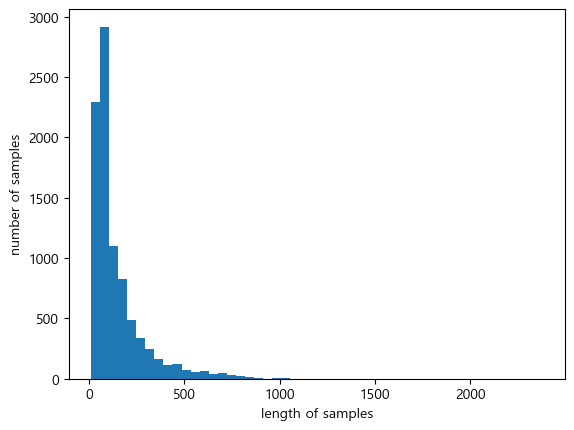

In [32]:
plt.hist([len(sample) for sample in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()   # 대체적으로 대부분의 뉴스가 100~200 사이의 길이

In [34]:
unique_elements, counts_elements=np.unique(Y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))   # 두개의 배열을 하나로 묶어서
# unique_elements, counts_elements

각 레이블에 대한 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [109]:
word_to_index=reuters.get_word_index()
# print(word_to_index)   # 그 단어에 대응하는 정수 인덱스를 value로

## 학습 및 평가

In [112]:
X_train=sequence.pad_sequences(X_train, maxlen=100)
X_test=sequence.pad_sequences(X_test,  maxlen=100)

In [114]:
model=Sequential()
model.add(keras.layers.Input(shape=(100, )))

model.add(keras.layers.Embedding(input_dim=1000, output_dim=128))
model.add(keras.layers.LSTM(100, activation='tanh'))
model.add(keras.layers.Dense(46, activation='softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 100, 128)            │         128,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100)                 │          91,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 46)                  │           4,646 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224,246 (875.96 KB)

 Trainable params: 224,246 (875.96 KB)

 Non-trainable params: 0 (0.00 B)

In [118]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [120]:
early_stopping_callback=EarlyStopping(monitor='val_loss', patience=5)

In [122]:
history=model.fit(X_train, Y_train, batch_size=128, epochs=30, validation_split=0.3, callbacks=[early_stopping_callback])

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 233ms/step - accuracy: 0.3289 - loss: 3.0844 - val_accuracy: 0.4694 - val_loss: 2.0845
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 184ms/step - accuracy: 0.4766 - loss: 2.1075 - val_accuracy: 0.5013 - val_loss: 1.9571
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step - accuracy: 0.5025 - loss: 1.9338 - val_accuracy: 0.5302 - val_loss: 1.7982
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 192ms/step - accuracy: 0.5380 - loss: 1.8066 - val_accuracy: 0.5455 - val_loss: 1.8421
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 198ms/step - accuracy: 0.5560 - loss: 1.7740 - val_accuracy: 0.4360 - val_loss: 2.0321
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 221ms/step - accuracy: 0.4986 - loss: 1.8612 - val_accuracy: 0.5481 - val_loss: 1.8232
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 262ms/step - accuracy: 0.5213 - loss: 1.8456 - val_accuracy: 0.5388 - val_loss: 1.7385
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 278ms/step - accuracy: 0.5381 - loss: 1.7415 - val_accura

In [124]:
model.evaluate(X_test, Y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6924 - loss: 1.3279


[1.3355175256729126, 0.6883348226547241]

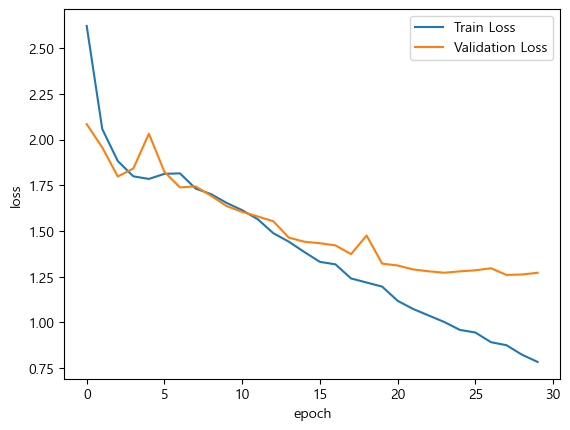

In [126]:
# 그래프 
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# 실습문제 - IMDB 리뷰 감성 분류
- IMDB : Movie Review Sentiment Analysis
- 스탠포드 대학교에서 2011년에 낸 논문, 긍부정 1/0,  훈련테스트 50:50대 비율
- 해당 논문 : http://ai.stanford.edu/~amaas/papers/wvSent_acl2011.pdf
- 케라스 데이터 셋 : https://keras.io/api/datasets/
- 위키독스 : https://wikidocs.net/24586

## 데이터 전처리

In [140]:
(X_train, Y_train), (X_test, Y_test)=imdb.load_data(num_words=5000)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [141]:
print("첫번째 훈련용 리뷰:", X_train[0])       # 정수 인코딩(각 단어를 정수로 변환 / 빈도수)
print("첫번째 훈련용 리뷰 레이블:", Y_train[0])

첫번째 훈련용 리뷰: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]
첫번째 훈련용 리뷰 레이블: 1


In [142]:
print('리뷰의 최대 길이 :{}'.format(max(len(sample) for sample in X_train)))
print('리뷰의 평균 길이 :{}'.format(sum(map(len, X_train))/len(X_train)))

리뷰의 최대 길이 :2494
리뷰의 평균 길이 :238.71364


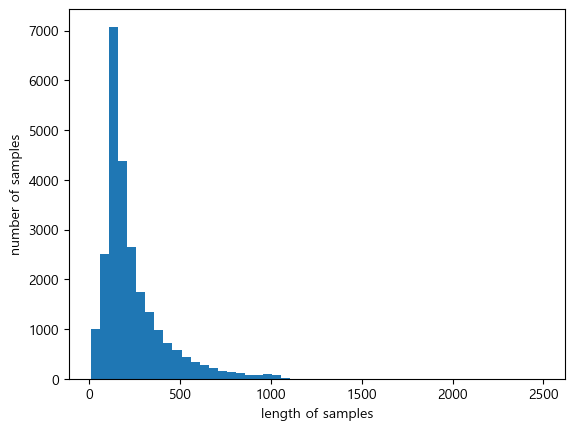

In [143]:
plt.hist([len(sample) for sample in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()   # 대체적으로 대부분의 뉴스가 100~200 사이의 길이

In [144]:
unique_elements, counts_elements=np.unique(Y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[    0     1]
 [12500 12500]]


In [145]:
word_to_index=reuters.get_word_index()
# word_to_index

## 학습 및 평가

In [153]:
X_train=sequence.pad_sequences(X_train, maxlen=500)
X_test=sequence.pad_sequences(X_test, maxlen=500)

In [154]:
model=Sequential()
model.add(keras.layers.Input(shape=(500, )))

model.add(keras.layers.Embedding(input_dim=5000, output_dim=100))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv1D(64, kernel_size=5, activation='relu'))   #  텍스트에서 중요한 구문이나 패턴을 인식할 때 Conv1D가 효과적
model.add(keras.layers.MaxPooling1D(pool_size=4))

model.add(keras.layers.LSTM(55, activation='tanh'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 500, 100)            │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 500, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 496, 64)             │          32,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 124, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 55)                  │          26,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              56 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 558,520 (2.13 MB)

 Trainable params: 558,520 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [155]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [157]:
early_stopping_callback=EarlyStopping(monitor='val_loss', patience=5)

In [161]:
history=model.fit(X_train, Y_train, batch_size=64, epochs=3, validation_split=0.25, callbacks=[early_stopping_callback])   # epochs=15

Epoch 1/3
293/293 ━━━━━━━━━━━━━━━━━━━━ 56s 181ms/step - accuracy: 0.6570 - loss: 0.5655 - val_accuracy: 0.8808 - val_loss: 0.2895
Epoch 2/3
293/293 ━━━━━━━━━━━━━━━━━━━━ 62s 211ms/step - accuracy: 0.8978 - loss: 0.2615 - val_accuracy: 0.8846 - val_loss: 0.2784
Epoch 3/3
293/293 ━━━━━━━━━━━━━━━━━━━━ 57s 196ms/step - accuracy: 0.9142 - loss: 0.2212 - val_accuracy: 0.8888 - val_loss: 0.2800


In [162]:
model.evaluate(X_test, Y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.8854 - loss: 0.2982


[0.29788923263549805, 0.8852400183677673]

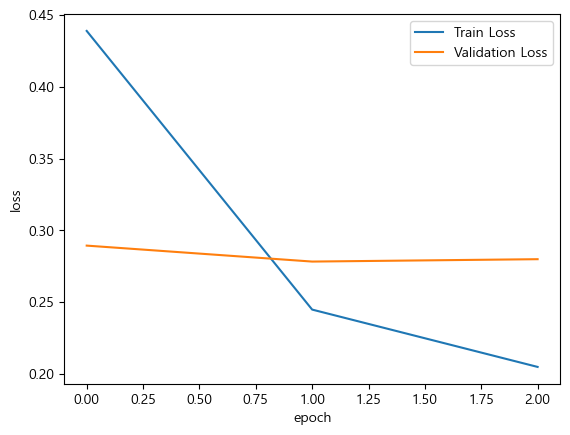

In [167]:
# 그래프 
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()